# 1. Histogramas

In [18]:
"""This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data.
If n_hist is not provided the default value is 100."""
function super_histograma(vec::Array,n_hist=100)
    N_ord = sort(vec)
    
    dx = (N_ord[end]-N_ord[1])/n_hist
    x_1 = N_ord[1]

    histo = zeros(n_hist)
      
    for k = 1 : length(N_ord)
        
        x_1 = N_ord[1]
        
        for j = 1 : length(histo)
            
            x_2 = x_1 + dx
            
            if N_ord[k] >= x_1 && N_ord[k] <= x_2
                
                histo[j] += 1
                break
                
            else
                x_1 += dx
            
            end
        end
    end
    return histo
end

super_histograma (generic function with 2 methods)

Nuestra función está bien documentada. Veamos esto:

In [19]:
?super_histograma

search: super_histograma



This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data. If n_hist is not provided the default value is 100.


Probemos ahora con un vector `M` de ~ 10,000 entradas.

In [20]:
M = randn(10000);

Saquemos el histograma de `M` con nuestra gran función `super_histograma()`. 

In [21]:
h = super_histograma(M,100)

100-element Array{Float64,1}:
  1.0
  0.0
  2.0
  0.0
  0.0
  1.0
  5.0
  2.0
  7.0
  3.0
  7.0
  9.0
 15.0
  ⋮  
  3.0
  0.0
  1.0
  5.0
  0.0
  2.0
  1.0
  0.0
  0.0
  0.0
  0.0
  1.0

Finalmente, grafiquemos el histograma de `M`.

**Nota:** Se graficó histograma vs rango($n_{hist}$) con fines ilustrativos solamente.

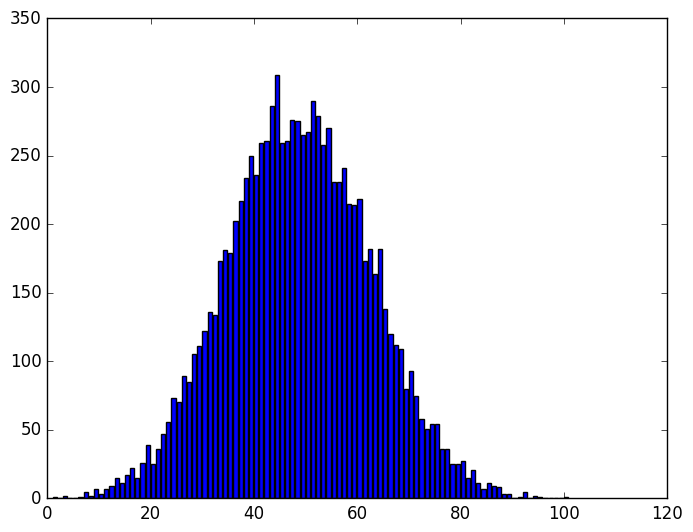

In [22]:
using PyPlot
bar(1:100,h);

# 2. Promedio y Varianza

#### a)Definir funciones para calcular promedio y varianza, comparando con *mean* y *var*

Para un conjunto de n números ${x_1,x_2,...,x_n}$, su promedio o media aritmética esta dada por $\bar{x}=\frac{1}{n}\sum\limits_{i=1}^n x_i$. Además, su varianza se calcula a partir del promedio y está dada por $\sigma_n^2=\frac{1}{n}\sum\limits_{i=1}^n (\bar{x}-x_i)^2$.

In [23]:
"This function calculates the arithmetic mean over all the elements of an array"

function promedio(S::Array) #el argumento es un array de cualquier dimensión
    sum=0.0
    for j in S  #el for corre sobre los elementos del array y los va sumando
        sum+=j
        #println(j)
    end 
    #println("suma=",sum)
    return sum/length(S)
end    

promedio (generic function with 1 method)

In [24]:
promedio(M) #la función calcula el promedio de todos los elementos del arreglo M, definido anteriormente

0.023808124332673045

In [25]:
Q=rand(10); #creamos un vector de 10 entradas

10-element Array{Float64,1}:
 0.556465
 0.782287
 0.189121
 0.902989
 0.855927
 0.39089 
 0.674782
 0.961602
 0.479017
 0.162753

In [26]:
promedio(Q') #la función también puede calcularlo con su conjugado

0.5955834355677094

In [27]:
P=rand(3,3,4);

In [28]:
promedio(P) #también funciona con arreglos de mayores dimensiones

0.6045300512004934

A continuación definiremos la función varianza

In [29]:
"Esta función calcula la varianza de un arreglo n dimensional de números" 

function varianza(S::Array) #el argumento es un array de cualquier dimensión
    sum=0.0
    for j in S  #el for corre sobre los elementos del array y los va sumando
        sum+=(promedio(S)-j)^2
        #println(j)
    end 
    #println("suma=",sum)
    return sum/length(S)
end    

varianza (generic function with 1 method)

In [30]:
varianza(M), varianza(Q),varianza(Q'),varianza(P),varianza([NaN]),varianza([0.1]) #ejemplos de ejecución de la función

(1.0059265382689222,0.0746948828484976,0.0746948828484976,0.08843430113424912,NaN,0.0)

A continuación compararemos con las funciones *mean* y *var* que tiene Julia

In [31]:
T1=[mean(M),promedio(M)] 

2-element Array{Float64,1}:
 0.0238081
 0.0238081

In [32]:
abs(T1[1]-T1[2]) #hay una pequeña diferencia numérica

3.469446951953614e-17

In [33]:
T2=[var(M),varianza(M)]

2-element Array{Float64,1}:
 1.00603
 1.00593

In [34]:
abs(T2[1]-T2[2]) #la diferencia es ahora mucho mayor pues se acumula con cada llamada a promedio en varianza

0.00010060271410394783

In [35]:
@time promedio(M);
@time varianza(M);

  0.000016 seconds (150 allocations: 10.729 KB)
  0.091765 seconds (5 allocations: 176 bytes)


In [36]:
@time mean(M); #la diferencia en tiempo en promedio no es muy significativa 
@time var(M); #la diferencia en tiempo en varianza sí lo es

  0.000012 seconds (5 allocations: 176 bytes)
  0.000016 seconds (8 allocations: 288 bytes)


1.0060271409830261

#### b) Implementar método para hacer los cálculos con una sola lectura de datos

A continuación definiremos una función que calcula ambos valores: promedio y varianza con una sola lectura de los datos del array y devuelve una tupla con ambos resultados

In [37]:
"""
Esta función calcula el promedio y la varianza de un conjunto de datos con una sola lectura array 
y devuelve una tupla con ambos resultados. 
Fuente: https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function unalectura(S::Array)
    n = 0
    mean = 0.0
    M2 = 0.0
     
    for x in S
        n += 1
        delta = x - mean
        mean += delta/n
        M2 += delta*(x - mean)
    end
    
    if n < 2
        return [NaN,NaN]
    else
        return [mean,M2 / n] #dividimos entre n pues si tomamos n-1 estamos calculando la correción de Bessel de la varianza
    end
end    

unalectura (generic function with 1 method)

In [38]:
promedio(M),varianza(M), unalectura(M) 

(0.023808124332673045,1.0059265382689222,[0.023808124332673035,1.0059265382689266])

In [39]:
abs(promedio(M)-unalectura(M)[1]) #diferencia en los resultados es muy pequeña

1.0408340855860843e-17

In [40]:
abs(varianza(M)-unalectura(M)[2]) #la diferencia también es muy pequeña, aunque trés órdenes de magnitud mayor

4.440892098500626e-15

In [41]:
@time promedio(M);
@time varianza(M);

  0.000013 seconds (5 allocations: 176 bytes)
  0.093219 seconds (5 allocations: 176 bytes)


In [42]:
@time unalectura(M); #es mucho más veloz que el cálculo con varianza() puesto que debe realizar menos iteraciones

  0.000085 seconds (7 allocations: 272 bytes)


2-element Array{Float64,1}:
 0.0238081
 1.00593  

#### c) Comparar ambos algoritmos para datos de distintas longitudes con diferentes órdenes de magnitud 

A continuació generaremos distintos arreglos aleatorios de datos de 1 dimensión para evaluar los algoritmos 

In [43]:
A=rand(10); #en 0:1

10-element Array{Float64,1}:
 0.639824 
 0.244241 
 0.0487439
 0.0474558
 0.193413 
 0.669567 
 0.552576 
 0.644445 
 0.359638 
 0.0988399

In [44]:
B=rand(10^4);

In [45]:
C=rand(-typemax(Int64):typemax(Int64),10); #rangos máximos de enteros

10-element Array{Int64,1}:
 -6787917684483961437
 -2127160374783974212
 -7422868322423122285
  4334563522628257253
 -6130913972627203704
 -1383579641755166991
 -1199411034247934038
 -5371473188631450851
  5264171005075180073
   617921529562018565

In [46]:
D=rand(-typemax(Int64):typemax(Int64),10^4);

In [47]:
E=rand(-eps(1.0):eps(1.0),10);

In [48]:
F=rand(-eps(1.0):eps(1.0),10^4);

A continuación evaluaremos los datos en las distintas funciones

In [49]:
@time promedio(A);
@time unalectura(A)
promedio(A),varianza(A),unalectura(A)

  0.000002 seconds (5 allocations: 176 bytes)
  0.000002 seconds (7 allocations: 272 bytes)


(0.3498744618056759,0.05950228693030658,[0.34987446180567583,0.05950228693030658])

In [50]:
@time promedio(B);
@time unalectura(B)
promedio(B),varianza(B),unalectura(B)

  0.000015 seconds (5 allocations: 176 bytes)
  0.000085 seconds (7 allocations: 272 bytes)


(0.4996435119620689,0.08178894131047688,[0.4996435119620674,0.08178894131047719])

In [51]:
@time promedio(C);
@time unalectura(C)
promedio(C),varianza(C),unalectura(C)

  0.003626 seconds (2.07 k allocations: 100.926 KB)
  0.005657 seconds (4.07 k allocations: 195.758 KB)


(-2.0206668161687355e18,1.8154414219292594e37,[-2.0206668161687357e18,1.81544142192926e37])

In [52]:
@time promedio(D);
@time unalectura(D)
promedio(D),varianza(D),unalectura(D)

  0.000041 seconds (5 allocations: 176 bytes)
  0.000120 seconds (7 allocations: 272 bytes)


(-1.9930048420131732e16,2.827452243504636e37,[-1.99300484201316e16,2.8274522435046323e37])

In [53]:
@time promedio(E);
@time unalectura(E)
promedio(E),varianza(E),unalectura(E)

  0.000002 seconds (5 allocations: 176 bytes)
  0.000002 seconds (7 allocations: 272 bytes)


(-2.220446049250313e-16,0.0,[-2.220446049250313e-16,0.0])

In [54]:
@time promedio(F);
@time unalectura(F)[1]
promedio(F),varianza(F),unalectura(F)

  0.000015 seconds (5 allocations: 176 bytes)
  0.000053 seconds (8 allocations: 288 bytes)


(-2.220446049250313e-16,0.0,[-2.220446049250313e-16,0.0])

# 3. Método de Simpson para integrar

El *método de Simpson* es un método de integración numérica para la aproximación de integrales definidas en un intervalo *(a,b)*.

Sigue esta forma:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$
Definiremos ahora la función `simpson()` que nos permitirá aproximar la integral de cualquier función en un intervalo *(a,b)*:

In [55]:
"""This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson.
It accepts as parameters function f and two numbers a,b that define the interval inside which the integral of f will be approximated."""
function simpson(f::Function,a,b)
    integral = (b-a)/6 * (f(a)+4*f((a+b)/2)+f(b));
    return integral
end

simpson (generic function with 1 method)

Si el intervalo *(a,b)* es suficientemente pequeño, la función `simpson()` nos da una aproximación adecuada de la integral. Pero si la función no es tan *suave* en el intervalo (o es muy oscilatoria) no es suficiente esta aproximación.

Así, si partimos nuestro intervalo en *n* (par) segmentos iguales, podemos hacer el método de Simpson en cada uno de esos segmentos para obtener una mejor aproximación a nuestra integral:
$$ \int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0) + 2 \sum _{j=1}^{n/2-1} f(x_{2j}) + 4\sum_{j = 1}^{n/2} f(x_{2j-1}) + f(x_n)\right] $$

donde $x_0 = a$ y $x_n = b$.

In [56]:
"""General form of simpson(), that takes an additional input n - the number of subintervals of (a,b). Refer to ?simpson."""
function simpson2(f::Function,a,b,n::Int64=100)
    
    if n<= 0 # Chequeamos si es no positivo
        error("N negativo")
    end
    
    n += n % 2; # Nos aseguramos que sea suma sobre los pares.
    h = (b-a)/n;
    
    x = a+h:h:b-h; # El rango sobre el cual integraremos.
    
    integral = f(a)+f(b); # Fijamos el valor no iterativo de la integral.
    
    N = convert(Int64,(n/2)) # Convertimos el índice a entero.
    
    for k = 1 : (N-1) # Primer término de la suma.
        integral += 2*f(x[2*k])
    end
    
    for k = 1 : N # Segundo término de la suma.
        integral += 4*f(x[2*k-1]) 
    end
    
    return integral*h/3
end

simpson2 (generic function with 2 methods)

Definamos nuestra función prueba como $f(x) = x^2$.

In [57]:
f(x) = x^2

f (generic function with 1 method)

Sabemos que la integral de $f(x) = x^2$ es $\frac{x^3}{3}$ y, evaluada de 0 a 1, nos da un valor de $\approx 0.333333$. Veamos si nuestra función es acertada.

In [58]:
simpson2(f,0,1,100)

0.3333333333333333

Además, veamos que si tomamos el intervalo inverso (i.e., el (1,0)), nos da el negativo de la integral.

In [59]:
simpson2(f,1,0,100)

-0.3333333333333332

Ahora, comparemos la eficiencia de `simpson()` con su forma generalizada `simpson2()`, para $g(x) = sin(x)$, de 0 a $\pi$.

In [60]:
g(x) = sin(x);

In [61]:
simpson(g,0,pi)

2.0943951023931953

In [62]:
simpson2(g,0,pi,100)

2.000000010824504

Como vemos, en este caso `simpson2()` es MUCHO más precisa para aproximar la integral.